In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[       0.0000,        0.0000, -2857256.0000],
        [       0.0000, -2652752.0000,        0.0000],
        [       0.0000,        0.0000,        0.0000],
        [       0.0000,        0.0000,        0.0000],
        [       0.0000,        0.0000, -2749398.0000]])


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9841, 0.7115, 0.6065],
        [0.1584, 0.3525, 0.8297],
        [0.3040, 0.3887, 0.2289],
        [0.7581, 0.4899, 0.9278],
        [0.3279, 0.2375, 0.5208]])


In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.0576,  0.8978, -0.6099],
        [-1.3874, -0.1055, -1.2038],
        [ 0.7621, -0.8787,  0.7493],
        [ 0.2986, -0.6955,  0.1195],
        [-1.7599, -0.5441,  0.4015]])


In [8]:
print(x.size())

torch.Size([5, 3])


In [9]:
y = torch.rand(5, 3)
print(x + y)


tensor([[ 0.3936,  1.8451,  0.3290],
        [-1.2136,  0.3354, -0.3007],
        [ 0.9226, -0.6603,  1.3775],
        [ 0.3575, -0.6475,  0.1632],
        [-1.5033, -0.3878,  0.5529]])


In [13]:
print(torch.add(x, y))

tensor([[ 0.3936,  1.8451,  0.3290],
        [-1.2136,  0.3354, -0.3007],
        [ 0.9226, -0.6603,  1.3775],
        [ 0.3575, -0.6475,  0.1632],
        [-1.5033, -0.3878,  0.5529]])


In [14]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.3936,  1.8451,  0.3290],
        [-1.2136,  0.3354, -0.3007],
        [ 0.9226, -0.6603,  1.3775],
        [ 0.3575, -0.6475,  0.1632],
        [-1.5033, -0.3878,  0.5529]])


In [16]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.3936,  1.8451,  0.3290],
        [-1.2136,  0.3354, -0.3007],
        [ 0.9226, -0.6603,  1.3775],
        [ 0.3575, -0.6475,  0.1632],
        [-1.5033, -0.3878,  0.5529]])


In [17]:
print(x[:, 1])

tensor([ 0.8978, -0.1055, -0.8787, -0.6955, -0.5441])


In [18]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [20]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([2.2914])
2.2914204597473145


In [25]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [26]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [27]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [28]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [29]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

In [30]:
torch.cuda.is_available()

False

In [31]:
import torch

In [32]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [33]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [34]:
print(y.grad_fn)

In [35]:
z = y * y * 3
out = z.mean()

print(z, out)


tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [37]:
out

tensor(27., grad_fn=<MeanBackward1>)

In [38]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [39]:
out.backward()

In [40]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [41]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-380.0336, -409.7190, -895.4690], grad_fn=<MulBackward>)


In [42]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([ 51.2000, 512.0000,   0.0512])


In [43]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [45]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [46]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0526, -0.0385, -0.0797,  0.0432, -0.0420, -0.1077, -0.0330, -0.0801,
          0.1455,  0.1428]], grad_fn=<ThAddmmBackward>)


In [47]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [48]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9009, grad_fn=<MseLossBackward>)


In [49]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [50]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0259, -0.0048, -0.0067, -0.0083,  0.0044,  0.0026])


In [51]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [52]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [53]:
import torch
import torchvision
import torchvision.transforms as transforms

In [54]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [55]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

horse horse   car truck


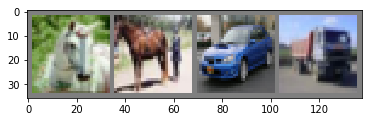

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [58]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [59]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [60]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.252
[1,  4000] loss: 1.907
[1,  6000] loss: 1.716
[1,  8000] loss: 1.596
[1, 10000] loss: 1.536
[1, 12000] loss: 1.494
[2,  2000] loss: 1.406
[2,  4000] loss: 1.383
[2,  6000] loss: 1.350
[2,  8000] loss: 1.331
[2, 10000] loss: 1.285
[2, 12000] loss: 1.260
Finished Training


GroundTruth:    cat  ship  ship plane


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f2ab901ff60>>
Traceback (most recent call last):
  File "/home/stein/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/stein/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/stein/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/stein/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/stein/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/stein/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get

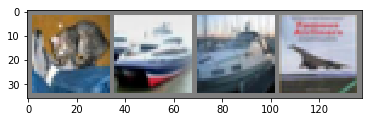

In [61]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [62]:
outputs = net(images)

In [63]:
outputs

tensor([[-1.3579, -2.6135,  1.4020,  3.3539, -0.1396,  2.4417,  1.8176, -0.7034,
         -1.1611, -1.7237],
        [ 3.9437,  5.0326, -1.0524, -2.7308, -2.6620, -3.3651, -2.7493, -3.0969,
          4.0365,  3.9953],
        [ 1.3583,  2.9082,  0.1780, -1.1300, -1.4525, -1.5413, -0.9494, -1.9225,
          0.8660,  2.3484],
        [ 3.5124, -0.3143,  0.7481, -1.2975,  0.5110, -2.8081, -0.7648, -2.5279,
          3.5410, -0.1868]], grad_fn=<ThAddmmBackward>)

In [65]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


In [66]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [67]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 65 %
Accuracy of  bird : 46 %
Accuracy of   cat : 48 %
Accuracy of  deer : 34 %
Accuracy of   dog : 45 %
Accuracy of  frog : 66 %
Accuracy of horse : 59 %
Accuracy of  ship : 57 %
Accuracy of truck : 71 %
